<a href="https://colab.research.google.com/github/olivia-rogers/Skin-Cancer-Detection-Through-Various-Classification-Models-/blob/main/Skin_Lesion_Project_Olivia_Rogers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls -lha kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [ ]:
#@title Steps for building model

#Step 0: split data into test and train
# 80% test, 20% train
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.33, random_state=42)

#Step 1: Initialize model (pull in all function handels)
#clf = LogisticRegression(random_state=0)

#Step 2: Train data
#clf.fit(X_train, y_train)

#Step 3: Predict on test
#y_pred = clf.predict(X_test)

# Step 4: Find accuracy
#accuracy = accuracy_score(y_true, y_pred)

In [ ]:
# TODO Build X and y
# X.shape # 3 -d matrix
# y.shape # 1d-vector

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tqdm import tqdm
import numpy as np
import pandas as pd
import os

from skimage import data
from skimage.color import rgb2gray
import cv2

image_dir = 'ham10000_images_part_1'
#image_dir2= 'ham10000_images_part_2'

#just using part 1 because system would crash if I used the whole dataset

image_files = [os.path.join(image_dir, fname)for fname in os.listdir(image_dir) if fname.endswith('.jpg')]
#image_files2 = [os.path.join(image_dir2, fname)for fname in os.listdir(image_dir2) if fname.endswith('.jpg')]

# Load and convert images into NumPy array
image_data = []

for img_path in tqdm(image_files): # change
    img = cv2.imread(img_path) # reads in bgr automatically
    img_array = np.array(img)
    img_array = cv2.resize(img_array, (45, 60)) #change shape
    image_data.append(img_array)

# Convert to NumPy array
image_data = np.array(image_data)


100%|██████████| 5000/5000 [00:32<00:00, 153.70it/s]


In [ ]:
X = image_data
labels= pd.read_csv('HAM10000_metadata.csv')
label_data = []

#dataset for y (label_data) should only include the rows that correspond to the images in my image_data
for i in range(len(X)):
    file_path = image_files[i]
    name = os.path.basename(file_path)
    image_id_check = os.path.splitext(name)[0]

    # Find label row where image_id matches
    matching_rows = labels[labels['image_id'] == image_id_check]

    if not matching_rows.empty:
        label_data.append(matching_rows.iloc[0])
    else:
        print(f"No label found for image_id: {image_id_check}")

label_data = pd.DataFrame(label_data)

#print(label_data.columns)
y = label_data['dx'] # change
y.shape

(5000,)

# Preprocessing

In [ ]:
print("Image array shape:", image_data.shape)
#image = np.reshape(image,5000, 450*600*3)

Image array shape: (5000, 60, 45, 3)


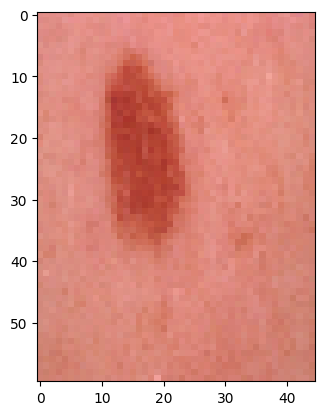

In [ ]:
image = image_data[4999]
im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # change
plt.imshow(im)

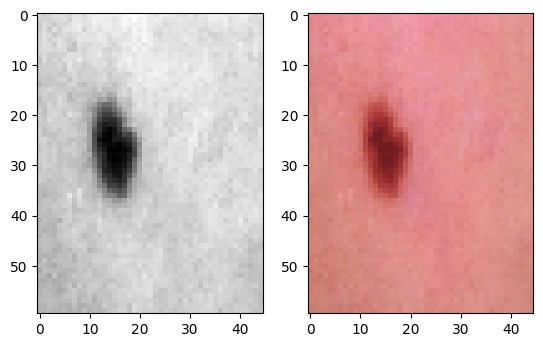

In [ ]:

fig, ax = plt.subplots(ncols=2)
image = image_data[3]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # change

#Coverting images to grayscale

def color_to_gray(image):
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return gray_image

gray_image = color_to_gray(image)

ax[0].imshow(gray_image, cmap='gray')
ax[1].imshow(image)


In [ ]:
image_data.shape

(5000, 60, 45, 3)

In [ ]:
# creating a new dataset with the gray images
gray_image_data=[]

for image in image_data:
  gray_image_data.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

gray_image_data=np.array(gray_image_data)
gray_image_data.shape

(5000, 60, 45)

In [ ]:
from sklearn import metrics

In [ ]:
# normalizing the pixel values of the images
def normalize_image (image):
  return (image - np.min(image)) / (np.max(image) - np.min(image))

#ax[0].imshow(normalize_image(image_data[0]))
#ax[1].imshow(image_data[0])

In [ ]:
norm_imgs = []
for im in image_data: # could also use grayscale image set
  norm_imgs.append(normalize_image(im))
norm_imgs = np.array(norm_imgs)

In [ ]:
image_data.shape

(5000, 60, 45, 3)

In [ ]:
gray_image_data.shape

(5000, 60, 45)

In [ ]:
X.shape

(5000, 60, 45, 3)

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
#Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=0.33, random_state=42)



In [ ]:
# change
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3]))
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3]))

# Plots

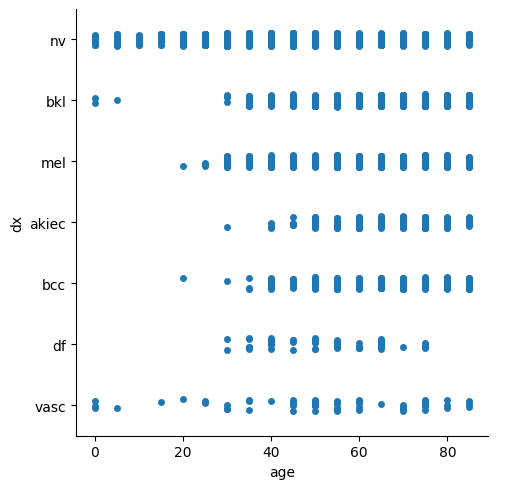

In [ ]:
import seaborn as sns

sns.catplot(x = 'age', y = 'dx', data = label_data)

In [ ]:
plt.bar(x=label_data['dx'], height)

TypeError: bar() missing 1 required positional argument: 'height'

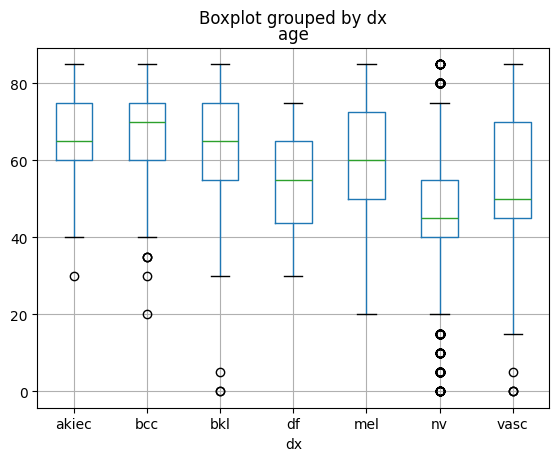

In [ ]:
label_data.boxplot(column='age', by='dx')

plt.show()

In [ ]:
label_data.iloc[2]

,3624
lesion_id,HAM_0002459
image_id,ISIC_0029305
dx,nv
dx_type,follow_up
age,40.0
sex,male
localization,trunk


In [1]:
print(label_data.keys()) #columns

NameError: name 'label_data' is not defined

In [ ]:
label_data


,lesion_id,image_id,dx,dx_type,age,sex,localization
8250,HAM_0004239,ISIC_0024928,nv,histo,75.0,female,lower extremity
4424,HAM_0006338,ISIC_0025125,nv,follow_up,70.0,male,abdomen
3624,HAM_0002459,ISIC_0029305,nv,follow_up,40.0,male,trunk
5024,HAM_0000371,ISIC_0025395,nv,follow_up,55.0,female,lower extremity
829,HAM_0006755,ISIC_0025339,bkl,confocal,65.0,male,scalp
...,...,...,...,...,...,...,...
2226,HAM_0006764,ISIC_0027590,mel,histo,85.0,female,lower extremity
6061,HAM_0004916,ISIC_0026010,nv,follow_up,35.0,female,foot
6387,HAM_0001016,ISIC_0028845,nv,follow_up,35.0,male,abdomen
2065,HAM_0002079,ISIC_0029146,mel,histo,65.0,male,face


In [ ]:
label_data = pd.DataFrame(label_data)

In [ ]:
print(type(label_data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
label_data.shape

(5000, 7)

In [ ]:
image_data.shape

(5000, 60, 45, 3)

In [ ]:
label_counts = label_data.iloc[2].value_counts()
##print(label_counts)

3624
HAM_0002459     1
ISIC_0029305    1
nv              1
follow_up       1
40.0            1
male            1
trunk           1
Name: count, dtype: int64


# Data Augmentation

In [ ]:
### Data Augmentation ###

import random
import cv2

image_len = 2*(len(image_data))


augmented_images = []
augmented_labels = []
#fig, axs = plt.subplots(2, 3, figsize=(10, 7)) # 2 rows, 3 columns

def append_array (new_image,label):
  augmented_images.append(new_image)
  #print("appended")
  augmented_labels.append(label)
  return

M = np.float32([
	[1, 0, 8],
	[0, 1, -6]
])

for i in range (len(image_data)):
  label = label_data['dx'].iloc[i]
  #label_counts = label_data[i].value_counts()
  #print(label)
  value= random.random()
  old_image = image_data[i]

  if label_counts[label] > 3500:
    continue

  if label is None or label != 'nv':
    #print(i, label)

    if label is None:
      print(i)
      continue

    #old_image = (image_data[i])
    #old_image = cv2.imread(old_image)

    if value <=0.33:
      new_image=(cv2.flip(old_image,0))
      append_array(new_image, label_data.iloc[i])

    if value <=0.66:
      new_image=(cv2.flip(old_image,1))
      append_array( new_image,label_data.iloc[i])

    if value<=1:
      new_image = cv2.warpAffine(old_image, M, (old_image.shape[1], old_image.shape[0]))
      append_array(new_image, label_data.iloc[i])
      #plt.imshow(new_image)

    if len(image_data)>10000:
      break

image_data = np.concatenate((image_data, augmented_images), axis=0)
label_data = np.concatenate((label_data, augmented_labels), axis=1)

image_data = np.array(image_data)
label_data = pd.DataFrame(label_data)

    # ax = axs.flatten()[i-12]
    # ax.imshow(np.hstack([old_image, new_image]))
    # ax.set_title(f"{label} (original | flipped)")

KeyError: 'bkl'

In [ ]:
label_data.shape

In [ ]:
image_data.shape

# Models

# KNN

In [ ]:

import matplotlib.pyplot as plt

accuracy = []

for i in range (1,200,10):

  knn = KNeighborsClassifier(n_neighbors=i)

  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  acc = accuracy_score(y_test, y_pred)

  accuracy.append(acc)
  print(f"{acc:.2f}")

plt.plot(accuracy)
plt.title("KNN")
plt.xlabel("n")
plt.ylabel("Accuracies")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7242424242424242


In [ ]:
precision_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.6382798944673748

In [ ]:
y_pred.shape
np.unique(y_pred)

array(['akiec', 'bcc', 'bkl', 'nv'], dtype=object)

In [ ]:
np.unique(y_test)

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype=object)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average = 'micro')

print(f1)

0.7242424242424242


[[   0   17    7    0    0   37    0]
 [   1   17    8    0    0   49    0]
 [   0   18   72    0    2   94    0]
 [   0    5    2    0    0   19    0]
 [   0    4   30    0    0  119    0]
 [   0    5   35    0    0 1087    0]
 [   0    2    3    0    0   17    0]]


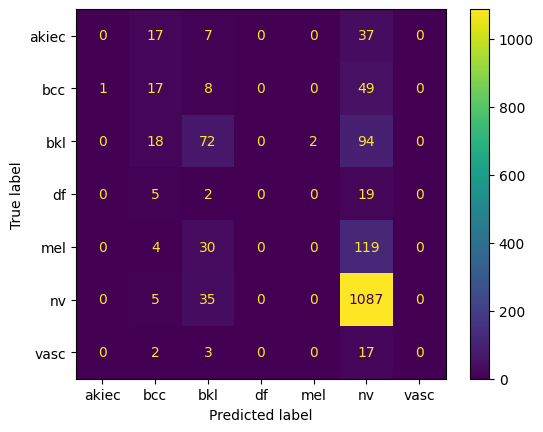

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
disp.plot()
plt.show()

# Decision Tree

In [ ]:
dt_accuracy =[]

for i in range(1,300,20):

  clf = DecisionTreeClassifier(random_state=i)

  clf.fit(X_train,y_train)

  y_pred = clf.predict(X_test)

  accuracy = accuracy_score(y_test,y_pred)

  dt_accuracy.append(accuracy)

plt.plot(dt_accuracy)
plt.title("Decision Tree")
plt.xlabel("n")
plt.ylabel("Accuracies")

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
clf = DecisionTreeClassifier(random_state=20)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)



In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
precision_score(y_test, y_pred, average='weighted')

In [ ]:
f1 = f1_score(y_test, y_pred, average = 'weighted')

print(f1)

In [ ]:
cm = confusion_matrix(y_test, y_pred,labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
print(cm)

dt_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
dt_disp.plot()
plt.show()

NameError: name 'confusion_matrix' is not defined

# SVC

Text(0, 0.5, 'Accuracies')

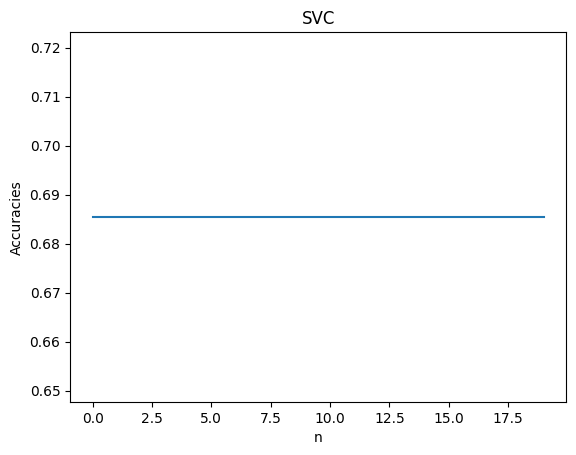

In [ ]:
from sklearn.svm import SVC

svc_accuracy= []
svc_c_num=[]
for i in range(1,200,10):

  #C_num=i

  svm_classifier = SVC(kernel='sigmoid', C=1, random_state=i)

  #svc_c_num.append(C_num)

  svm_classifier.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = svm_classifier.predict(X_test)

  # Calculate accuracy
  svc_accuracy.append(accuracy_score(y_test, y_pred))

  #print(svc_accuracy)

plt.plot(svc_accuracy)
plt.title("SVC")
plt.xlabel("random_state num")
plt.ylabel("Accuracies")

#linear: Accuracy: 0.6854545454545454

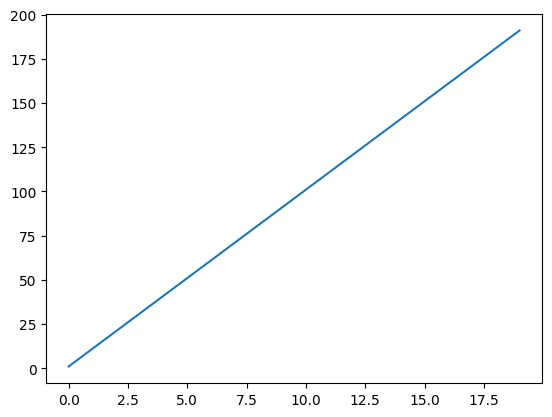

In [ ]:
plt.plot(svc_c_num)

In [ ]:
svc_c_num

[1,
 11,
 21,
 31,
 41,
 51,
 61,
 71,
 81,
 91,
 101,
 111,
 121,
 131,
 141,
 151,
 161,
 171,
 181,
 191]

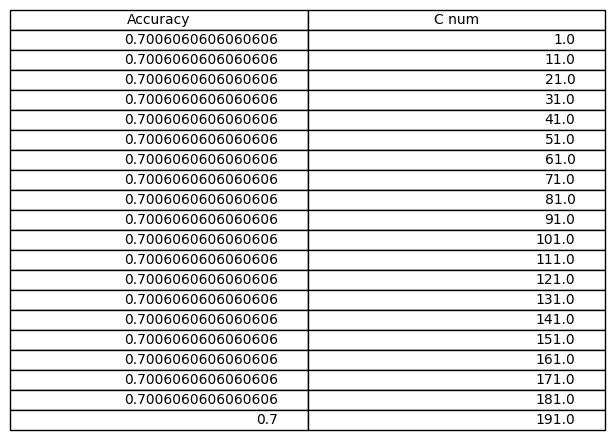

In [ ]:
svc_accuracy= pd.DataFrame(svc_accuracy)
svc_c_num=pd.DataFrame(svc_c_num)

combined_df = pd.concat([svc_accuracy, svc_c_num], axis=1)

headers=["Accuracy", "C num"]

fig, ax = plt.subplots()
ax.axis('off')  # Hide axes for a clean table
table = ax.table(cellText=combined_df.to_numpy(), colLabels=headers, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()


In [ ]:
from sklearn.metrics import recall_score


In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=2, random_state=20)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.6757575757575758


In [ ]:
precision_score(y_test, y_pred, average='weighted')

0.6555260105552959

In [ ]:
recall_score(y_test, y_pred, average='weighted')

In [ ]:
f1_Score = f1_score(y_test, y_pred, average = 'micro')

print(f1_Score)

0.6757575757575758


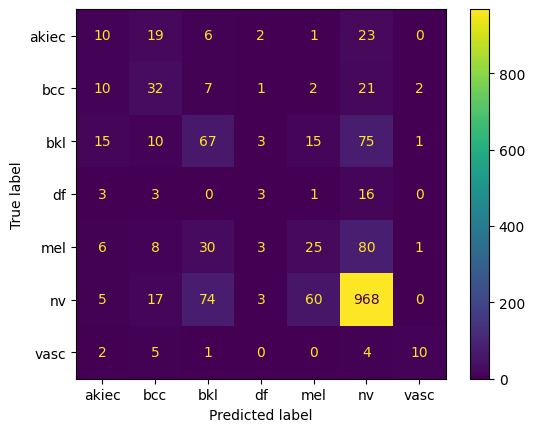

[[ 10  19   6   2   1  23   0]
 [ 10  32   7   1   2  21   2]
 [ 15  10  67   3  15  75   1]
 [  3   3   0   3   1  16   0]
 [  6   8  30   3  25  80   1]
 [  5  17  74   3  60 968   0]
 [  2   5   1   0   0   4  10]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred,labels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
disp.plot()
plt.show()
print(cm)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Define the class order
class_names = (list(label_data['dx'].dropna().astype(str)))

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=class_names)

# y_pred must be an array of predicted probabilities with same class order
# Example: y_pred = model.predict_proba(X_test)  # shape: (n_samples, 3)

# Index of the class 'mel'
mel_index = class_names.index('mel')

# Get true binary labels and predicted probs for class 'mel'
fpr, tpr, thresholds = roc_curve(y_test_bin[:,mel_index], y_pred)


# Random Forest Classifier


Text(0, 0.5, 'Accuracies')

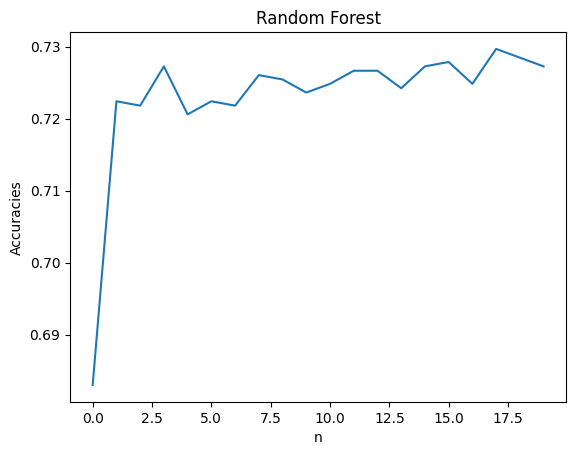

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_regression
from sklearn.metrics import f1_score

rf_accuracy = []

for i in range(1,200,10):

  regr = RandomForestClassifier(max_depth=i, random_state=i)

  regr.fit(X_train, y_train)

  y_pred = regr.predict(X_test)

  rf_accuracy.append(accuracy_score(y_test,y_pred))

  #print(f1_score(y_test, y_pred, max_depth = None))

plt.plot(rf_accuracy)
plt.title("Random Forest")
plt.xlabel("n")
plt.ylabel("Accuracies")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_regression
from sklearn.metrics import f1_score

regr = RandomForestClassifier(max_depth=None, random_state=17)

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7266666666666667


In [ ]:
precision_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.6741130366758029

In [ ]:
rf_f1_score = f1_score(y_test, y_pred, average = 'micro')

print(rf_f1_score)

0.7266666666666667


[[   4   12   13    0    0   32    0]
 [   1   18   13    0    0   43    0]
 [   2   11   77    0    2   94    0]
 [   0    5    2    0    0   19    0]
 [   4    1   21    0    9  118    0]
 [   0    4   27    0    6 1090    0]
 [   0    1    0    0    0   20    1]]


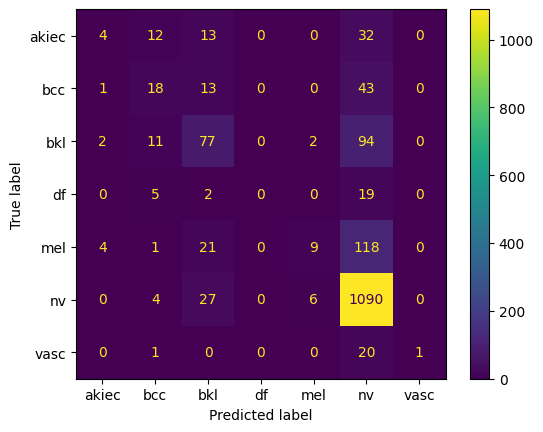

[[   4   12   13    0    0   32    0]
 [   1   18   13    0    0   43    0]
 [   2   11   77    0    2   94    0]
 [   0    5    2    0    0   19    0]
 [   4    1   21    0    9  118    0]
 [   0    4   27    0    6 1090    0]
 [   0    1    0    0    0   20    1]]


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
print(cm)

rf_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
rf_disp.plot()
plt.show()
print(cm)

# MLP


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_layers =[]

mlp_layers.append((100,))

mlp_layers.append((100, 50))

mlp_layers.append((300, 50, 2))

for i in mlp_layers:

  clf = MLPClassifier(random_state=1, hidden_layer_sizes= i, max_iter=300)

  clf.fit(X_train, y_train)

  y_pred=clf.predict(X_test)

  acc = accuracy_score(y_test, y_pred)

  print(acc)


0.7006060606060606
0.49272727272727274
0.7006060606060606


In [ ]:
plt.plot(mlp_accuracy)
plt.title("MLP")
plt.ylabel("Accuracies")

In [ ]:
print (acc)


0.7006060606060606
